In [426]:
import numpy as np
from IPython.display import HTML
from matplotlib import pyplot as plt
from tqdm import notebook
from itertools import combinations
import scipy as sp
from scipy import linalg
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter 
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 선형대수로 열 방정식 풀기
- Gunhee Cho 교수님 말 처럼 미분 방정식은 일반적으로 풀기 매우 어렵다.
- 어려운 문제를 푸는 방법 중 하나는 쉬운 문제부터 풀고 점점 어렵게 만드는 것이다.
- 본 노트의 주제는 연이수의 핵심 방정식인 열 방정식(heat equation)을 수치적(numerical)으로 푸는 것이다.
- 다행이 열 방정식은 선형(linear)라 아주 방법이 없는 것은 아니다. 선형이라는 것의 의미는 다음과 같다. 열 방정식의 해를 $f,g$라 하면 다음이 성립한다.
<!-- \begin{align}
\frac{\partial}{\partial t} (f + g) $= \alpha \nabla^2 (f + g) \\
\frac{\partial}{\partial t} (c f) $= \alpha \nabla^2 (c f)
\end{align} -->
$$
\frac{\partial}{\partial t} (f + g) = \alpha \nabla^2 (f + g) ,
$$
$$
\frac{\partial}{\partial t} (c f) = \alpha \nabla^2 (c f)
$$
- 여기서 $c,~\alpha$는 상수다. 따라서 열 방정식의 해의 공간은 벡터 공간을 이룬다.  
- (~~우리 마음의 고향~~)벡터 공간 $\to$ 선형 대수를 사용할 수 있다.
- 일단 제일 간단한 문제로 가보자. 1차원 열 방정식은 다음과 같다. 
$$
\frac{\partial}{\partial t} u(x,t) = \alpha \frac{\partial^2}{\partial^2 x} u(x,t)
$$
- 처음 접하는 문제는 변수 $t,x$가 연속이란 것이다. 컴퓨터는 연속인 변수를 계산할 수 없다. 따라서 연속인 변수를 유한한 공간으로 나눠야 한다. 먼저 미분의 정의를 생각해보자.
$$
f'(x) = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}
$$
- $h$가 충분히 작다면 다음과 같이 근사할 수 있다.
$$
f'(x) \sim  \frac{f(x+h)-f(x)}{h}
$$
- 그런데 미분 계수를 근사하는 것은 이 방법만 있는 것은 아니다. Forward, Backward, Central [방법](
https://en.wikipedia.org/wiki/Finite_difference#In_differential_equations)이 존재한다.  
Forward difference
$$
f'(x) \sim \frac{f(x+h)-f(x)}{h}
$$
Backward difference
$$
f'(x) \sim \frac{f(x)-f(x-h)}{h}
$$
Centeral difference
$$
f'(x) \sim \frac{f(x+\frac{h}{2})-f(x-\frac{h}{2})}{h}
$$
- 따라서 이계 미분(second differential)은 다음과 같다.   
Forward difference
$$
f''(x) \sim  \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}
$$
Backwad difference
$$
f''(x) \sim  \frac{f(x)-2f(x-h)+f(x-2h)}{h^2}
$$
Central difference
$$
f''(x) \sim  \frac{f(x+h)-2f(x)+f(x-h)}{h^2}
$$
- 한번 확인해보자

In [2]:
def derivative(f,x,h,direction='forward'):
    if direction == 'forward':
        return (f(x+h)-f(x)) / h
    if direction == 'backward':
        return (f(x)-f(x-h)) / h
    if direction == 'central':
        return (f(x+h/2)-f(x-h/2)) / h
def second_derivative(f,x,h,direction='forward'):
    if direction == 'forward':
        return (f(x+2*h)-2*f(x+h)+f(x)) / h**2
    if direction == 'backward':
        return (f(x)-2*f(x-h)+f(x-2*h)) / h**2
    if direction == 'central':
        return (f(x+h)-2*f(x)+f(x-h)) / h**2

In [3]:
def test_func1(x):
    return x**2
def test_func2(x):
    return np.sin(x)

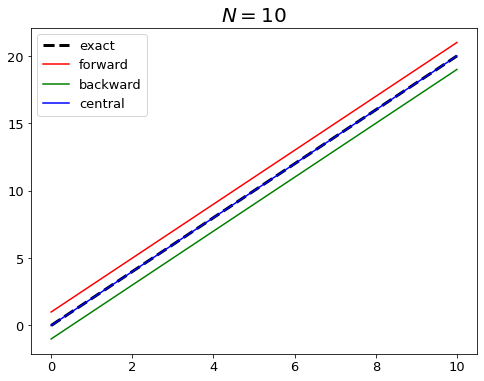

In [4]:
N = 10
a = 0
b = 10
h = (b-a) / N
x = np.linspace(a,b,num=N)
x_ = np.linspace(a,b,num=N+1)
x__ = np.linspace(a,b,num=N+2)
# f' forward
f_f = derivative(test_func1,x_,h,'forward')
# f' backward
f_b = derivative(test_func1,x_,h,'backward')
# f' central
f_c = derivative(test_func1,x_,h,'central')

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 13
plt.plot(x,x*2,color='black',linestyle='dashed',linewidth=3,label='exact')
plt.plot(x_,f_f,color='r',label='forward')
plt.plot(x_,f_b,color='g',label='backward')
plt.plot(x_,f_c,color='b',label='central')
plt.legend()
plt.title(f'$N=${N}',fontsize=20)
plt.show()

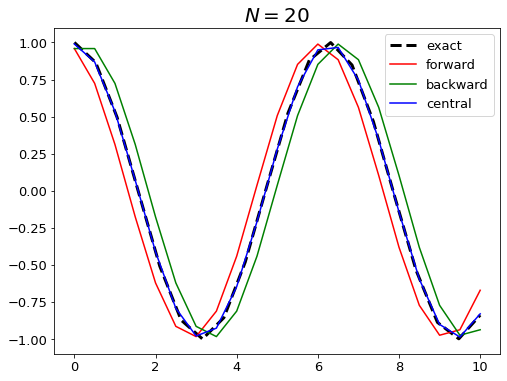

In [5]:
N = 20
a = 0
b = 10
h = (b-a) / N
x = np.linspace(a,b,num=N)
x_ = np.linspace(a,b,num=N+1)
x__ = np.linspace(a,b,num=N+2)
# f' forward
f_f = derivative(test_func2,x_,h,'forward')
# f' backward
f_b = derivative(test_func2,x_,h,'backward')
# f' central
f_c = derivative(test_func2,x_,h,'central')

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 13
plt.plot(x,np.cos(x),color='black',linestyle='dashed',linewidth=3,label='exact')
plt.plot(x_,f_f,color='r',label='forward')
plt.plot(x_,f_b,color='g',label='backward')
plt.plot(x_,f_c,color='b',label='central')
plt.legend()
plt.title(f'$N=${N}',fontsize=20)
plt.show()

- (~~이계 미분은 직접 해보세요~~)수렴하는 정도가 다 다르다(물론 $N$이 충분히 크면 같다).
- 이제 1차원 열 방정식의 해 $u(x,t)$를 유한한 구간으로 나누어보자.
$$
x \in [x_1,x_2],~~t \in [t_1,t_2],~~~h=\frac{x_2-x_1}{N},~~h' = \frac{t_2-t_1}{N}
$$
- 우리가 알고 싶은 것은 현재 시간($t$)일 때 $u$를 통해서 다음 순간($t+h'$)에서 $u$이다.  
- $u$를 다음과 같이 벡터로 만들자.
$$
u(x,t)=u(x_1+ih,t_1+nh') = u_{in}
$$
- 변수 $x,t$에 대해 유한 차분(finite difference) 방법을 다르게 잡을 수 있다. 먼저 [explict method](
https://en.wikipedia.org/wiki/Finite_difference_method#Explicit_method)는 시간을 forward, 위치를 central 하게 잡는다.
$$
\frac{u_{i,n+1}-u_{i,n}}{h'} = \alpha \frac{u_{i+1,n}-2u_{i,n}+u_{i-1,n}}{h^2}
$$
- Explict method의 문제는 $r=h'\alpha/h^2 \le 1/2$어야 solution이 stable, convergent하다는 것이다(정확한 정의는 링크 참조)
- 일반적으로 많이 쓰이는 방법으로 [Crank-Nicolson mothod](https://en.wikipedia.org/wiki/Finite_difference_method#Crank%E2%80%93Nicolson_method)
가 있다.요지는 시간을 $t_{n+1/2}$에서 central하게, $x_n$에서 central하게 나눈다. 그러면 좌변은 다음과 같다.
$$
\frac{u_{i,(n+1/2)+1/2}-u_{i,(n+1/2)-1/2}}{h'} = \frac{u_{i,n+1}-u_{i,n}}{h'}
$$
우변은 다음과 같다.
\begin{align}
\alpha \frac{u_{i+1,n+1/2}-2u_{i,n+1/2}+u_{i-1,n+1/2}}{h'} = \frac{\alpha}{2} \biggl(
\frac{u_{i+1,n+1}-2u_{i,n+1}+u_{i-1,n+1}}{h^2} + \frac{u_{i+1,n}-2u_{i,n}+u_{i-1,n}}{h^2}
\biggr)
\end{align}
따라서 다음과 같다.
$$
2u_{i,n+1}-2u_{i,n} =
r \biggl(
u_{i+1,n+1}-2u_{i,n+1}+u_{i-1,n+1} + u_{i+1,n}-2u_{i,n}+u_{i-1,n}
\biggr)
$$
$u_{\cdot,n+1}$에 대해 정리하면
$$
-ru_{i+1,n+1} + (2+2r)u_{i,n+1} - ru_{i-1,n+1} = d_n,~~~d_n = ru_{i+1,n} + (2-2r)u_{i,n} + ru_{i-1,n}
$$
따라서 $d_n$가 주어지면 열 방정식은 [tridiagonal equation](https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm)을 푸는 것과 동치다.
$$
a_n x_{n+1} + b_n x_n + c_n x_{n-1} = d_n
$$
- Tridiagonal equation은 일반적인 linear equation보다 훨씬 효율적으로 풀 수 있다는 사실이 알려져있다(링크 참조). 관련 라이브러리를 찾지 못해 매우 귀찮지만 다음과 같이 구현해봤다.

In [246]:
def tri_diag_solver(a,b,c,d):
    N = b.shape[0]
    x = np.zeros((N,))
    c_ = np.zeros((N-1,))
    d_ = np.zeros((N,))
    c_[0] = c[0] / b[0]
    d_[0] = d[0] / b[0]
    for i in np.arange(1,N-1):
        c_[i] = c[i] / (b[i]-a[i]*c_[i-1])
        d_[i] = (d[i]-a[i]*d_[i-1]) / (b[i]-a[i]*c_[i-1])
    d_[-1] = (d[-1]-a[-1]*d_[-2]) / (b[-1]-a[-1]*c_[-1])
    x[N-1] = d_[N-1]
    for i in np.arange(N-1)[::-1]:
        x[i] = d_[i] - c_[i] * x[i+1]
    return x

In [366]:
# sicpy linalg method와 같은지 확인
# M = np.array([[1,1,0],[-1,2,1],[0,-1,3]])
# a = np.array([-1,-1])
# b = np.array([1,2,3])
# c = np.array([1,1])
# d = np.array([1,-1,1])

b = np.array((5, 6, 6, 6, 6, 6, 6, 6, 5), dtype=float) # Main Diagonal
a= np.array((0, 1, 1, 1, 1, 1, 1, 1, 1), dtype = float) # Lower Diagonal
c = np.array((1, 1, 1, 1, 1, 1, 1, 1, 0), dtype = float) # Upper Diagonal
d = np.array((3, 2, 1, 3, 1, 3, 1, 2, 3), dtype = float) # Solution Vector
N = b.shape[0]
M = np.zeros((N,N))
for i in np.arange(N):
    M[i,i] = b[i]
    if i < N-1:
        M[i,i+1] = a[i+1]
        M[i+1,i] = c[i]
x = linalg.solve(M,d)
x_ = tri_diag_solver(a[1:],b,c[:-1],d)
print(x)
print(x_)

[0.55330223 0.23348887 0.04576454 0.49192391 0.00269203 0.49192391
 0.04576454 0.23348887 0.55330223]
[0.55330223 0.23348887 0.04576454 0.49192391 0.00269203 0.49192391
 0.04576454 0.23348887 0.55330223]


- 이제 열 방정식을 풀 준비가 됐다. 추가로 고려해야 할 점은 초기조건(initial condition)과 경계조건(boundary condition)이다. $u_{i,n}$이 $N$차원 벡터라고 하면 전체 시간에 따른 solution $U$는 $N\times N$(시간을 행, 공간을 열로 두었다)matrix다. 여기에 초기 조건으로 행을 하나 추가하고 경계조건으로 열을 두개 추가해서 $(N+1)\times(N+2)$ matrix로 한다.
- 이렇게 하면 장점이 tridiagnoal matrix의 index 때문이다. $u^n_{-1}(0 \to -1),~u^n_{N+1}(N+2 \to N+1)$을 경계 값이라고 생각하는 것이다.
- 초기조건은 $u^0(i) = f(i)$으로 준다. -> U[0,i] = f(i) 로 정의하면 쉽다.
- 문제는 경계조건. $u^n(-1) = b_1(n),~~u^n(N+1)=b_2(n)$ 으로 하면 되는건 아는데 어떻게 구현해야 할까?
\begin{align}
u_{i,n+1}-u_{i,n} &= \frac{r}{2} \biggl(
(u_{i+1,n+1}-2u_{i,n+1}+u_{i-1,n+1}) + (u_{i+1,n}-2u_{i,n}+u_{i-1,n})
\biggr),\\
u_{0,n+1}-u_{0,n} &= \frac{r}{2} \biggl(
(u_{1,n+1}-2u_{0,n+1}+u_{-1,n+1}) + (u_{1,n}-2u_{0,n}+u_{-1,n})
\biggr) \\
&= \frac{r}{2} \biggl(
u_{1,n+1}-2u_{0,n+1}+b_1(n+1) + u_{1,n}-2u_{0,n}+b_1(n)
\biggr),\\
u_{N,n+1}-u_{N,n} &= \frac{r}{2} \biggl(
(u_{N+1,n+1}-2u_{N,n+1}+u_{N-1,n+1}) + (u_{N+1,n}-2u_{N,n}+u_{N-1,n})
\biggr) \\
&= \frac{r}{2} \biggl(
b_2(n+1)-2u_{N,n+1}+u_{N-1,n+1} + b_2(n)-2u_{N,n}+u_{N-1,n}
\biggr)
\end{align}
- Tridiagonal equation 양 끝에 $b_1,b_2$를 바꿔주면 된다.

In [425]:
def heat_eq_1d_solver(u,r,b1,b2):
    # b1, b2: 다음 스탭의 경계값
    u_ = u.copy()
    N = u.shape[0] 
    a = -r * np.ones((N-3,))
    b = (2+2*r) * np.ones((N-2,))
    c = -r * np.ones((N-3,))
    d = np.zeros((N-2,))
    for i in np.arange(N-2):
        d[i] = r * u[i] + (2-2*r) * u[i+1] + r * u[i+2]
    d[0] += r * b1
    d[-1] += r * b2
    u_[1:N-1] = tri_diag_solver(a,b,c,d)
    u_[0] = b1
    u_[-1] = b2
    return u_

Exact 한 예로 확인해보자.
 $$
 U_t = \alpha U_{xx},~~~\alpha = \frac{1}{\pi^2}
 $$
 경계조건
 $$
 U(0,t) = U(1,t) = 0
 $$
Solution
 $$
 U(x,t) = \frac{1}{\pi^2}e^{-t}\sin(\pi x)
 $$

In [423]:
alpha = 1 / np.pi**2
N_ = 1000
N = 500
x1 = 0
x2 = 1
t1 = 0
t2 = 1
t = np.linspace(t1,t2,num=N_)
x = np.linspace(x1,x2,num=N+2)
h = (x2-x1) / N
h_ = (t2-t1) / N_
r = alpha * h_ / h**2
U = np.ones((N_+1,N+2))
# 경계조건
U[0,:] = 0.
U[-1,:] = 0.
# b1 = 0.1 * np.ones((N_,))
# b2 = 0.1 * np.ones((N_,))
b1 = np.zeros((N_,))
b2 = np.zeros((N_,))
# 초기조건
U[0] = np.sin(np.pi*x) / np.pi**2
# U[0][1:N-1] = 0.0

In [424]:
for i in notebook.tqdm(np.arange(1,N_+1)):
    U[i] = heat_eq_1d_solver(U[i-1],r,b1[i-1],b2[i-1])

  0%|          | 0/1000 [00:00<?, ?it/s]

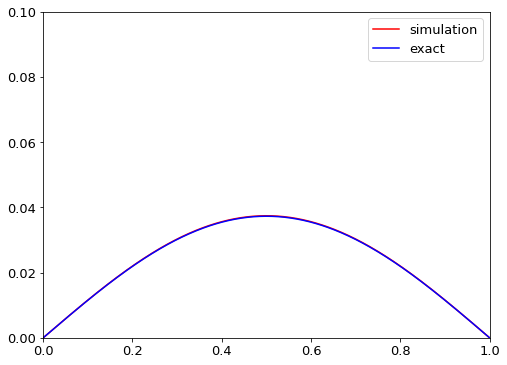

In [418]:
fig = plt.figure()
ax = fig.add_subplot()
i = 1000
ax.clear()
ax.plot(x,U[i],color='r',label='simulation')
ax.plot(x,np.exp(-(t1+i*h_))*np.sin(np.pi*x)/np.pi**2,color='b',label='exact')
ax.set_ylim(0.,0.1)
ax.set_xlim(0,1)
ax.legend()
plt.show()

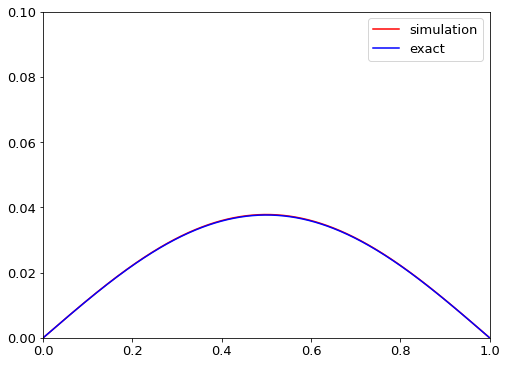

In [409]:
fps = 4
fig = plt.figure()
ax = fig.add_subplot()
def f(i):
    ax.clear()
    ax.plot(x,U[10*i],color='r',label='simulation')
    ax.plot(x,np.exp(-(t1+10*i*h_))*np.sin(np.pi*x)/np.pi**2,color='b',label='exact')
    ax.set_ylim(0.,0.1)
    ax.set_xlim(0,1)
    ax.legend()
    return fig
ani = animation.FuncAnimation(fig,f,frames=N_//10,interval=1,repeat = True)
ani.save("test1d_.gif", writer=PillowWriter(fps=100/fps),dpi=150)
plt.show()

 ### 잘 나온거 같다 :)